In [197]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

import datetime

import os

%config InlineBackend.figure_format = 'retina'

%matplotlib inline

plt.style.use('fivethirtyeight')

In [198]:
def DataInspect(dataframe):
    '''Original function (previously called eda) created by Ritika Bhasker
       Modified by Michael Schillawski based on his preferences.
       And now, Arash Ghafouri modified his version as the follow:'''
    
    print('Dataframe Shape:', dataframe.shape,'\n')
    print('Features Name ---> \n\n', list(dataframe),'\n')
    print('Dataframe Types ---> \n\n', dataframe.dtypes,'\n')    
    print('Missing Values ---> \n\n', dataframe.isnull().sum(),'\n')
    print('Dataframe Describe ---> \n\n', dataframe.describe(include='all'),'\n')
    print('Duplicate Rows:', dataframe.duplicated().sum(),'\n')
        
    print('Unique Values by Variable')
    for item in dataframe:
        print(item,':',dataframe[item].nunique())

#### Reading a Data

In [199]:
House_Original = pd.read_excel('US_House1.xlsx')
# House_Original = pd.read_excel('US_House.xlsx')
# House_Original = pd.read_csv('US_House.csv')

pd.set_option('display.max_columns', 500)
print(f"DataFrame Shape: {House_Original.shape}")
print(f"--------------------------------------------------")
print(f"DataFrame Columns:")
print(f"{House_Original.columns}")
print(f"--------------------------------------------------")
print(f"Last Ten Row of Data:")
House_Original.tail(10)

DataFrame Shape: (42, 46)
--------------------------------------------------
DataFrame Columns:
Index(['Year', 'Dem_WinLoose', 'Dem_GainLoss_Number', 'Dem_SeatPercentage',
       'Dem_GainLoss', 'Rep_WinLoose', 'Rep_GainLoss_Number',
       'Rep_SeatPercentage', 'Rep_GainLoss', 'House_Winner', 'President_Party',
       'President_Party_WinLoose', 'President_Party_GainLoss_Number',
       'President_Party_GainLoss', 'President_Party_SeatPercentage',
       'MidTerm_Election', 'President_Year_in_Office', 'Turnout_Percent',
       'Dem_Seat', 'Rep_Seat', 'Total_Seat', 'Dem_PopularVote',
       'Rep_PopularVote',
       'President_JobApproval_Begining_of_the_Election_Year',
       'President_JobApproval_Before_the_Election',
       'President_JobApproval_Trend', 'Party_Affiliation_ANES_StrongDem',
       'Party_Affiliation_ANES_WeakDem', 'Party_Affiliation_Dem',
       'Party_Affiliation_ANES_IndDem', 'Party_Affiliation_ANES_IndInd',
       'Party_Affiliation_ANES_IndRep', 'Party_Affiliati

,Year,Dem_WinLoose,Dem_GainLoss_Number,Dem_SeatPercentage,Dem_GainLoss,Rep_WinLoose,Rep_GainLoss_Number,Rep_SeatPercentage,Rep_GainLoss,House_Winner,President_Party,President_Party_WinLoose,President_Party_GainLoss_Number,President_Party_GainLoss,President_Party_SeatPercentage,MidTerm_Election,President_Year_in_Office,Turnout_Percent,Dem_Seat,Rep_Seat,Total_Seat,Dem_PopularVote,Rep_PopularVote,President_JobApproval_Begining_of_the_Election_Year,President_JobApproval_Before_the_Election,President_JobApproval_Trend,Party_Affiliation_ANES_StrongDem,Party_Affiliation_ANES_WeakDem,Party_Affiliation_Dem,Party_Affiliation_ANES_IndDem,Party_Affiliation_ANES_IndInd,Party_Affiliation_ANES_IndRep,Party_Affiliation_Dem_minus_Rep,Party_Affiliation_Ind,Party_Affiliation_ANES_WeakRep,Party_Affiliation_ANES_StrongRep,Party_Affiliation_Rep,Party_Affiliation_President,Party_Affiliation_President_minus_Opponent,Inflation_Rate,Inflation_Rate_Trend,Unemployment_Rate,Unemployment_Rate_Trend,GDP_Growth_Rate,GDP_Growth_Rate_trend,Major_Scandal
32,2010,0.0,-64.0,44.367816,0.0,1.0,64.0,55.632184,1.0,0.0,1,0.0,-64.0,0.0,44.367816,1,Two,41.0,193.0,242.0,435.0,51.7,44.9,51,45,0,NaN,NaN,33.0,NaN,NaN,NaN,8.0,35.0,NaN,NaN,25.0,33.0,8.0,1.5,0,9.3,0,2.6,1,NaN
33,2012,0.0,8.0,46.206897,1.0,1.0,-8.0,53.793103,0.0,0.0,1,0.0,8.0,1.0,46.206897,0,Four,58.2,201.0,234.0,435.0,48.8,47.6,46,52,1,25.1,14.7,39.8,12.6,13.4,10.3,16.4,36.3,10.5,12.9,23.4,39.8,16.4,1.7,0,7.9,0,2.2,1,NaN
34,2014,0.0,-13.0,43.218391,0.0,1.0,13.0,56.781609,1.0,0.0,1,0.0,-13.0,0.0,43.218391,1,Six,35.9,188.0,247.0,435.0,45.5,51.2,41,42,0,NaN,NaN,32.0,NaN,NaN,NaN,9.0,39.0,NaN,NaN,23.0,32.0,9.0,0.8,0,5.6,0,2.5,1,NaN
35,2016,0.0,6.0,44.597701,1.0,1.0,-6.0,55.402299,0.0,0.0,1,0.0,6.0,1.0,44.597701,0,Eight,60.0,194.0,241.0,435.0,48.0,49.1,47,53,1,20.8,13.1,33.9,11.5,13.6,11.7,5.1,36.8,11.9,16.9,28.8,33.9,5.1,2.1,1,4.7,0,1.6,0,NaN
36,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,Two,36.0,NaN,NaN,NaN,NaN,NaN,37,44,1,NaN,NaN,30.0,NaN,NaN,NaN,2.0,39.0,NaN,NaN,28.0,28.0,-2.0,1.9,0,3.7,0,3.5,1,NaN
37,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,Two,37.0,NaN,NaN,NaN,NaN,NaN,37,44,1,NaN,NaN,30.0,NaN,NaN,NaN,2.0,39.0,NaN,NaN,28.0,28.0,-2.0,1.9,0,3.7,0,3.5,1,NaN
38,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,Two,38.0,NaN,NaN,NaN,NaN,NaN,37,44,1,NaN,NaN,30.0,NaN,NaN,NaN,2.0,39.0,NaN,NaN,28.0,28.0,-2.0,1.9,0,3.7,0,3.5,1,NaN
39,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,Two,39.0,NaN,NaN,NaN,NaN,NaN,37,44,1,NaN,NaN,30.0,NaN,NaN,NaN,2.0,39.0,NaN,NaN,28.0,28.0,-2.0,1.I,0,3.7,0,3.5,1,NaN
40,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,Two,40.0,NaN,NaN,NaN,NaN,NaN,37,44,1,NaN,NaN,30.0,NaN,NaN,NaN,2.0,39.0,NaN,NaN,28.0,28.0,-2.0,1.9,0,3.7,0,3.5,1,NaN
41,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,Two,41.0,NaN,NaN,NaN,NaN,NaN,37,44,1,NaN,NaN,30.0,NaN,NaN,NaN,2.0,39.0,NaN,NaN,28.0,28.0,-2.0,1.9,0,3.7,0,3.5,1,NaN


#### Removing to be Predicted Rows

In [200]:
House = House_Original.copy()
House.drop([36, 37, 38, 39, 40, 41], axis=0, inplace=True)
House.tail()

,Year,Dem_WinLoose,Dem_GainLoss_Number,Dem_SeatPercentage,Dem_GainLoss,Rep_WinLoose,Rep_GainLoss_Number,Rep_SeatPercentage,Rep_GainLoss,House_Winner,President_Party,President_Party_WinLoose,President_Party_GainLoss_Number,President_Party_GainLoss,President_Party_SeatPercentage,MidTerm_Election,President_Year_in_Office,Turnout_Percent,Dem_Seat,Rep_Seat,Total_Seat,Dem_PopularVote,Rep_PopularVote,President_JobApproval_Begining_of_the_Election_Year,President_JobApproval_Before_the_Election,President_JobApproval_Trend,Party_Affiliation_ANES_StrongDem,Party_Affiliation_ANES_WeakDem,Party_Affiliation_Dem,Party_Affiliation_ANES_IndDem,Party_Affiliation_ANES_IndInd,Party_Affiliation_ANES_IndRep,Party_Affiliation_Dem_minus_Rep,Party_Affiliation_Ind,Party_Affiliation_ANES_WeakRep,Party_Affiliation_ANES_StrongRep,Party_Affiliation_Rep,Party_Affiliation_President,Party_Affiliation_President_minus_Opponent,Inflation_Rate,Inflation_Rate_Trend,Unemployment_Rate,Unemployment_Rate_Trend,GDP_Growth_Rate,GDP_Growth_Rate_trend,Major_Scandal
31,2008,1.0,24.0,59.080460,1.0,0.0,-24.0,40.919540,0.0,1.0,0,0.0,-24.0,0.0,40.919540,0,Eight,61.6,257.0,178.0,435.0,53.2,42.6,32,25,0,25.0,16.9,41.9,16.9,11.4,9.6,23.4,37.9,8.6,9.9,18.5,18.5,-23.4,0.1,0,7.3,1,-0.1,0,NaN
32,2010,0.0,-64.0,44.367816,0.0,1.0,64.0,55.632184,1.0,0.0,1,0.0,-64.0,0.0,44.367816,1,Two,41.0,193.0,242.0,435.0,51.7,44.9,51,45,0,NaN,NaN,33.0,NaN,NaN,NaN,8.0,35.0,NaN,NaN,25.0,33.0,8.0,1.5,0,9.3,0,2.6,1,NaN
33,2012,0.0,8.0,46.206897,1.0,1.0,-8.0,53.793103,0.0,0.0,1,0.0,8.0,1.0,46.206897,0,Four,58.2,201.0,234.0,435.0,48.8,47.6,46,52,1,25.1,14.7,39.8,12.6,13.4,10.3,16.4,36.3,10.5,12.9,23.4,39.8,16.4,1.7,0,7.9,0,2.2,1,NaN
34,2014,0.0,-13.0,43.218391,0.0,1.0,13.0,56.781609,1.0,0.0,1,0.0,-13.0,0.0,43.218391,1,Six,35.9,188.0,247.0,435.0,45.5,51.2,41,42,0,NaN,NaN,32.0,NaN,NaN,NaN,9.0,39.0,NaN,NaN,23.0,32.0,9.0,0.8,0,5.6,0,2.5,1,NaN
35,2016,0.0,6.0,44.597701,1.0,1.0,-6.0,55.402299,0.0,0.0,1,0.0,6.0,1.0,44.597701,0,Eight,60.0,194.0,241.0,435.0,48.0,49.1,47,53,1,20.8,13.1,33.9,11.5,13.6,11.7,5.1,36.8,11.9,16.9,28.8,33.9,5.1,2.1,1,4.7,0,1.6,0,NaN


#### Inspection of the Data

In [201]:
DataInspect(House)

Dataframe Shape: (36, 46) 

Features Name ---> 

 ['Year', 'Dem_WinLoose', 'Dem_GainLoss_Number', 'Dem_SeatPercentage', 'Dem_GainLoss', 'Rep_WinLoose', 'Rep_GainLoss_Number', 'Rep_SeatPercentage', 'Rep_GainLoss', 'House_Winner', 'President_Party', 'President_Party_WinLoose', 'President_Party_GainLoss_Number', 'President_Party_GainLoss', 'President_Party_SeatPercentage', 'MidTerm_Election', 'President_Year_in_Office', 'Turnout_Percent', 'Dem_Seat', 'Rep_Seat', 'Total_Seat', 'Dem_PopularVote', 'Rep_PopularVote', 'President_JobApproval_Begining_of_the_Election_Year', 'President_JobApproval_Before_the_Election', 'President_JobApproval_Trend', 'Party_Affiliation_ANES_StrongDem', 'Party_Affiliation_ANES_WeakDem', 'Party_Affiliation_Dem', 'Party_Affiliation_ANES_IndDem', 'Party_Affiliation_ANES_IndInd', 'Party_Affiliation_ANES_IndRep', 'Party_Affiliation_Dem_minus_Rep', 'Party_Affiliation_Ind', 'Party_Affiliation_ANES_WeakRep', 'Party_Affiliation_ANES_StrongRep', 'Party_Affiliation_Rep', 'Par

In [202]:
House.columns

Index(['Year', 'Dem_WinLoose', 'Dem_GainLoss_Number', 'Dem_SeatPercentage',
       'Dem_GainLoss', 'Rep_WinLoose', 'Rep_GainLoss_Number',
       'Rep_SeatPercentage', 'Rep_GainLoss', 'House_Winner', 'President_Party',
       'President_Party_WinLoose', 'President_Party_GainLoss_Number',
       'President_Party_GainLoss', 'President_Party_SeatPercentage',
       'MidTerm_Election', 'President_Year_in_Office', 'Turnout_Percent',
       'Dem_Seat', 'Rep_Seat', 'Total_Seat', 'Dem_PopularVote',
       'Rep_PopularVote',
       'President_JobApproval_Begining_of_the_Election_Year',
       'President_JobApproval_Before_the_Election',
       'President_JobApproval_Trend', 'Party_Affiliation_ANES_StrongDem',
       'Party_Affiliation_ANES_WeakDem', 'Party_Affiliation_Dem',
       'Party_Affiliation_ANES_IndDem', 'Party_Affiliation_ANES_IndInd',
       'Party_Affiliation_ANES_IndRep', 'Party_Affiliation_Dem_minus_Rep',
       'Party_Affiliation_Ind', 'Party_Affiliation_ANES_WeakRep',
       'Par

#### Target & Prediction + Dummies encoded to 1 and 0 in the Excel File

In [203]:
# President_Year_in_Office not Included
Predictors_with_Target = ['President_Party_GainLoss_Number',
                          'President_Party',
                          'MidTerm_Election', 
                          'Turnout_Percent', 
                          'President_JobApproval_Begining_of_the_Election_Year', 
                          'President_JobApproval_Before_the_Election',
                          'President_JobApproval_Trend', 
                          'Party_Affiliation_Dem',
                          'Party_Affiliation_Ind', 
                          'Party_Affiliation_Rep',
                          'Party_Affiliation_President_minus_Opponent', 
                          'Inflation_Rate', 'Inflation_Rate_Trend',
                          'Unemployment_Rate', 'Unemployment_Rate_Trend',
                          'GDP_Growth_Rate', 'GDP_Growth_Rate_trend']

Target = 'President_Party_GainLoss_Number'

# # Highly Correlated Removed
# Predictors_with_Target = ['President_Party_GainLoss_Number',
#                           'President_Party', 
#                           'MidTerm_Election', 
#                           'Turnout_Percent', 
#                           'President_JobApproval_Begining_of_the_Election_Year', 
#                           'President_JobApproval_Before_the_Election',
#                           'President_JobApproval_Trend', 
#                           'Party_Affiliation_Dem_minus_Rep', 
#                           'Party_Affiliation_Ind',  
#                           'Inflation_Rate', 'Inflation_Rate_Trend',
#                           'Unemployment_Rate', 'Unemployment_Rate_Trend',
#                           'GDP_Growth_Rate', 'GDP_Growth_Rate_trend']

# Target = 'President_Party_GainLoss_Number'

# # President_Year_in_Office not Included
# # Historical Politic
# Predictors_with_Target = ['President_Party_GainLoss_Number',
#                           'President_Party',
#                           'MidTerm_Election', 
#                           'Turnout_Percent', 
#                           'President_JobApproval_Begining_of_the_Election_Year', 
#                           'President_JobApproval_Before_the_Election',
#                           'President_JobApproval_Trend', 
#                           'Party_Affiliation_Dem',
#                           'Party_Affiliation_Ind', 
#                           'Party_Affiliation_Rep',
#                           'Party_Affiliation_President_minus_Opponent']

# Target = 'President_Party_GainLoss_Number'

# # President_Year_in_Office not Included
# # Historical Economy
# Predictors_with_Target = ['President_Party_GainLoss_Number', 'Inflation_Rate', 'Inflation_Rate_Trend',
#                           'Unemployment_Rate', 'Unemployment_Rate_Trend',
#                           'GDP_Growth_Rate', 'GDP_Growth_Rate_trend']

# Target = 'President_Party_GainLoss_Number'

Predictors_with_Target_df = House[Predictors_with_Target]

# Predictors_with_Target_df = pd.get_dummies(Predictors_with_Target_df)

DataInspect(Predictors_with_Target_df)

Dataframe Shape: (36, 17) 

Features Name ---> 

 ['President_Party_GainLoss_Number', 'President_Party', 'MidTerm_Election', 'Turnout_Percent', 'President_JobApproval_Begining_of_the_Election_Year', 'President_JobApproval_Before_the_Election', 'President_JobApproval_Trend', 'Party_Affiliation_Dem', 'Party_Affiliation_Ind', 'Party_Affiliation_Rep', 'Party_Affiliation_President_minus_Opponent', 'Inflation_Rate', 'Inflation_Rate_Trend', 'Unemployment_Rate', 'Unemployment_Rate_Trend', 'GDP_Growth_Rate', 'GDP_Growth_Rate_trend'] 

Dataframe Types ---> 

 President_Party_GainLoss_Number                        float64
President_Party                                          int64
MidTerm_Election                                         int64
Turnout_Percent                                        float64
President_JobApproval_Begining_of_the_Election_Year      int64
President_JobApproval_Before_the_Election                int64
President_JobApproval_Trend                              int64
Par

#### Correlation of the Features with the Target

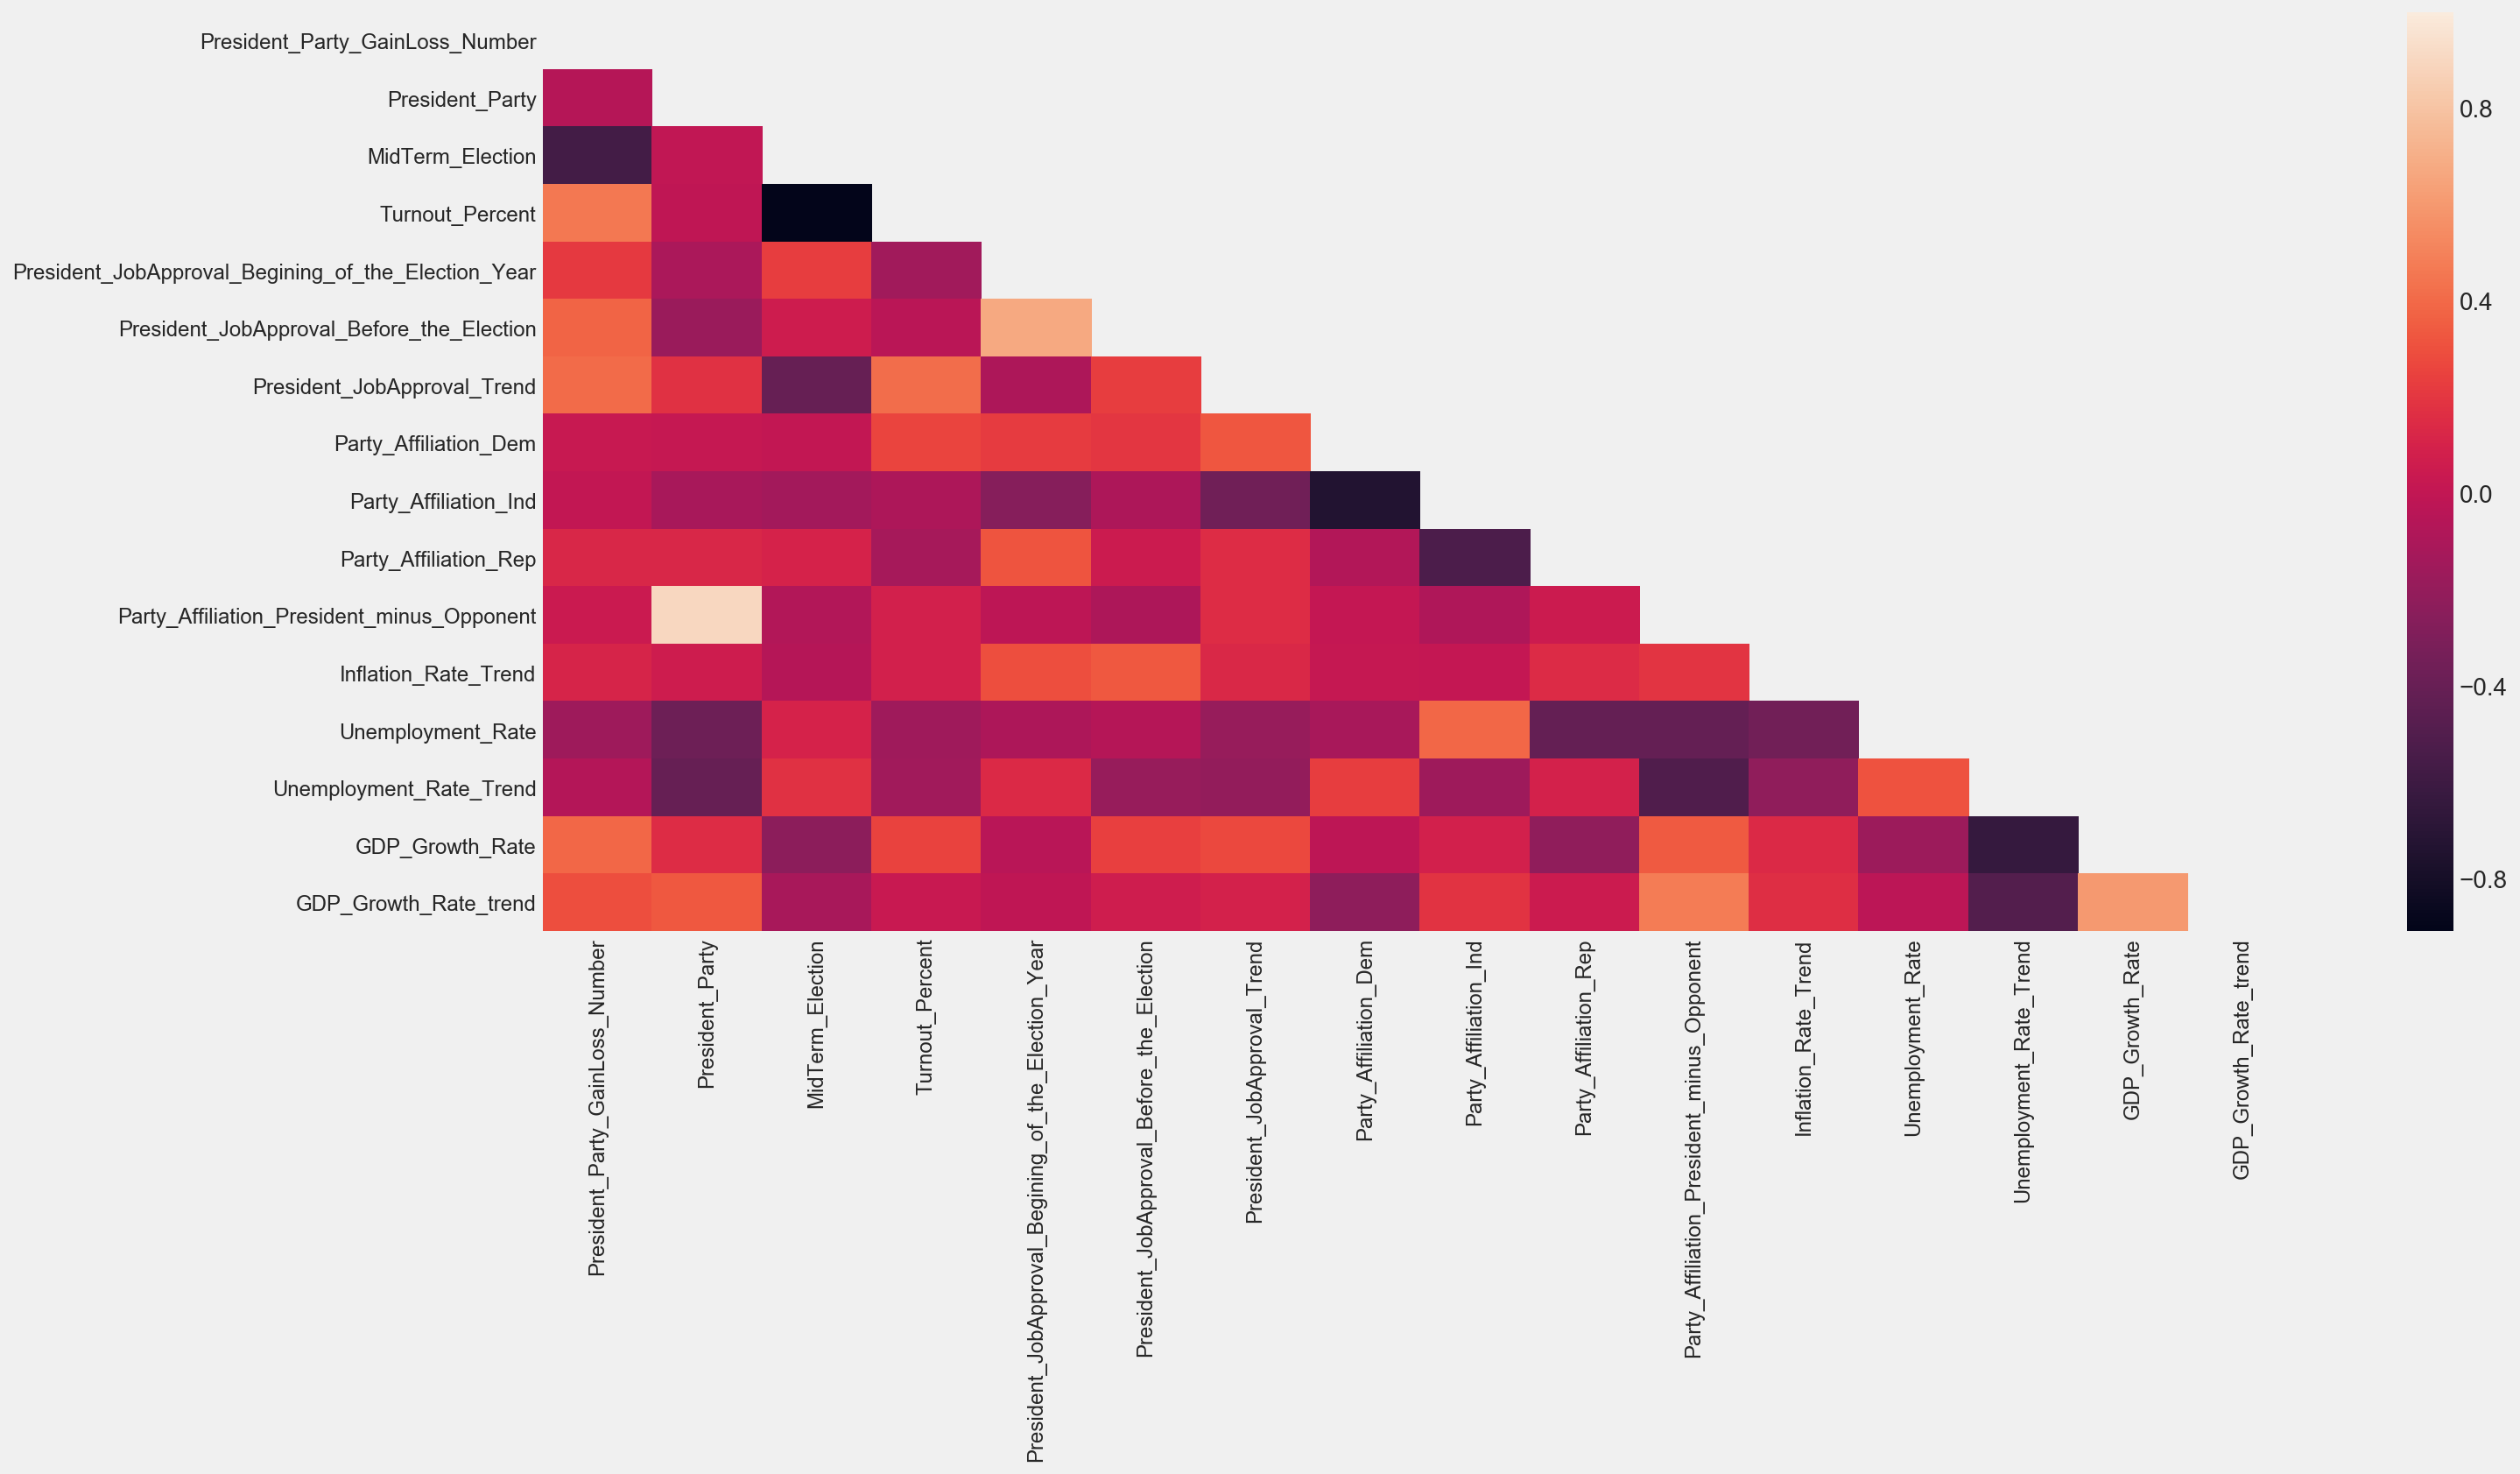

,President_Party_GainLoss_Number,President_Party,MidTerm_Election,Turnout_Percent,President_JobApproval_Begining_of_the_Election_Year,President_JobApproval_Before_the_Election,President_JobApproval_Trend,Party_Affiliation_Dem,Party_Affiliation_Ind,Party_Affiliation_Rep,Party_Affiliation_President_minus_Opponent,Inflation_Rate_Trend,Unemployment_Rate,Unemployment_Rate_Trend,GDP_Growth_Rate,GDP_Growth_Rate_trend
President_Party_GainLoss_Number,1.000000,-0.054728,-0.571605,0.463005,0.215209,0.379105,0.408169,0.028425,0.006856,0.125909,0.039640,0.105791,-0.161847,-0.064472,0.392489,0.294155
President_Party,-0.054728,1.000000,0.000000,-0.012686,-0.102624,-0.174763,0.173494,0.018624,-0.111451,0.123335,0.902503,0.055641,-0.375430,-0.404820,0.151262,0.335410
MidTerm_Election,-0.571605,0.000000,1.000000,-0.908719,0.228931,0.056613,-0.404820,0.002191,-0.139313,0.099122,-0.072905,-0.055641,0.102994,0.173494,-0.234213,-0.111803
Turnout_Percent,0.463005,-0.012686,-0.908719,1.000000,-0.143097,-0.029914,0.415464,0.258549,-0.089336,-0.124738,0.083048,0.087266,-0.148390,-0.143021,0.249918,0.036184
President_JobApproval_Begining_of_the_Election_Year,0.215209,-0.102624,0.228931,-0.143097,1.000000,0.677164,-0.095643,0.224457,-0.265473,0.314939,-0.016899,0.292756,-0.094616,0.138557,-0.042499,-0.007502
President_JobApproval_Before_the_Election,0.379105,-0.174763,0.056613,-0.029914,0.677164,1.000000,0.230179,0.195048,-0.092722,0.050549,-0.091089,0.332399,-0.055201,-0.190036,0.236714,0.066048
President_JobApproval_Trend,0.408169,0.173494,-0.404820,0.415464,-0.095643,0.230179,1.000000,0.321778,-0.362643,0.152761,0.155485,0.131931,-0.189064,-0.204013,0.275318,0.090521
Party_Affiliation_Dem,0.028425,0.018624,0.002191,0.258549,0.224457,0.195048,0.321778,1.000000,-0.734959,-0.067752,0.013694,0.021030,-0.116845,0.229407,-0.018853,-0.223405
Party_Affiliation_Ind,0.006856,-0.111451,-0.139313,-0.089336,-0.265473,-0.092722,-0.362643,-0.734959,1.000000,-0.522202,-0.085452,0.015725,0.392438,-0.156300,0.087443,0.184594
Party_Affiliation_Rep,0.125909,0.123335,0.099122,-0.124738,0.314939,0.050549,0.152761,-0.067752,-0.522202,1.000000,0.048529,0.145208,-0.414297,0.096050,-0.221148,0.050420


In [204]:
corr = Predictors_with_Target_df.corr()

# Setting the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(20,9))

# Generating a mask for the upper traingle )taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plotting the heatmap with seaborn
# Assigning the matplotlib axis the function returns. Ready to resize the labels
ax = sns.heatmap(corr, mask=mask, ax=ax)

# Resizing the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

plt.show()

corr
# https://www.mathsisfun.com/numbers/calculator.html

#### Features, X - Droping Extra Columns

In [205]:
X1_df = Predictors_with_Target_df.drop(['President_Party_GainLoss_Number'], axis = 1)
X1_df.shape

(36, 16)

In [206]:
X1 = X1_df[X1_df.columns].values
X1.shape

(36, 16)

#### Target, y

In [207]:
y = House.President_Party_GainLoss_Number.tolist()

#### Creating Dependent and Independent Variables and Independent DataFrame

In [208]:
INDs = X1
dep = y
df = X1_df

#### SKLearn - Metrics & Plots

Coefficients(Beta Vectors):
[-14.8840235  -59.69305213  -2.26353779   0.13531093   0.38241073
   9.12174334   2.25597131   2.04812738   3.01991583   0.64241822
  -2.83238824   0.98565455  -2.44114932  24.938402     1.86520235
   4.12111965]
---------------------------------------------------
---------------------------------------------------
Intercept:
-115.4590012819022
---------------------------------------------------
---------------------------------------------------
Predicted values(y_hat)
[-64.25440507  47.78997157 -23.47932078 -20.7350171   -8.49234322
   4.52757661 -15.26663393  12.07809771 -20.78953987  27.90661868
 -30.15466682  -8.63339528 -32.62538409  14.04763412 -46.77681894
 -11.57199401 -26.86097727 -13.31096222 -41.35179047  17.51615728
 -15.54746465  11.09762264  -6.71809957  10.57326701 -25.8363188
  23.62379689  -2.66911192   7.02731723  17.72447681  -1.41941177
 -41.42551594 -21.36937558 -49.94365773   2.61127702 -29.53242774
  -1.75918079]
---------------------

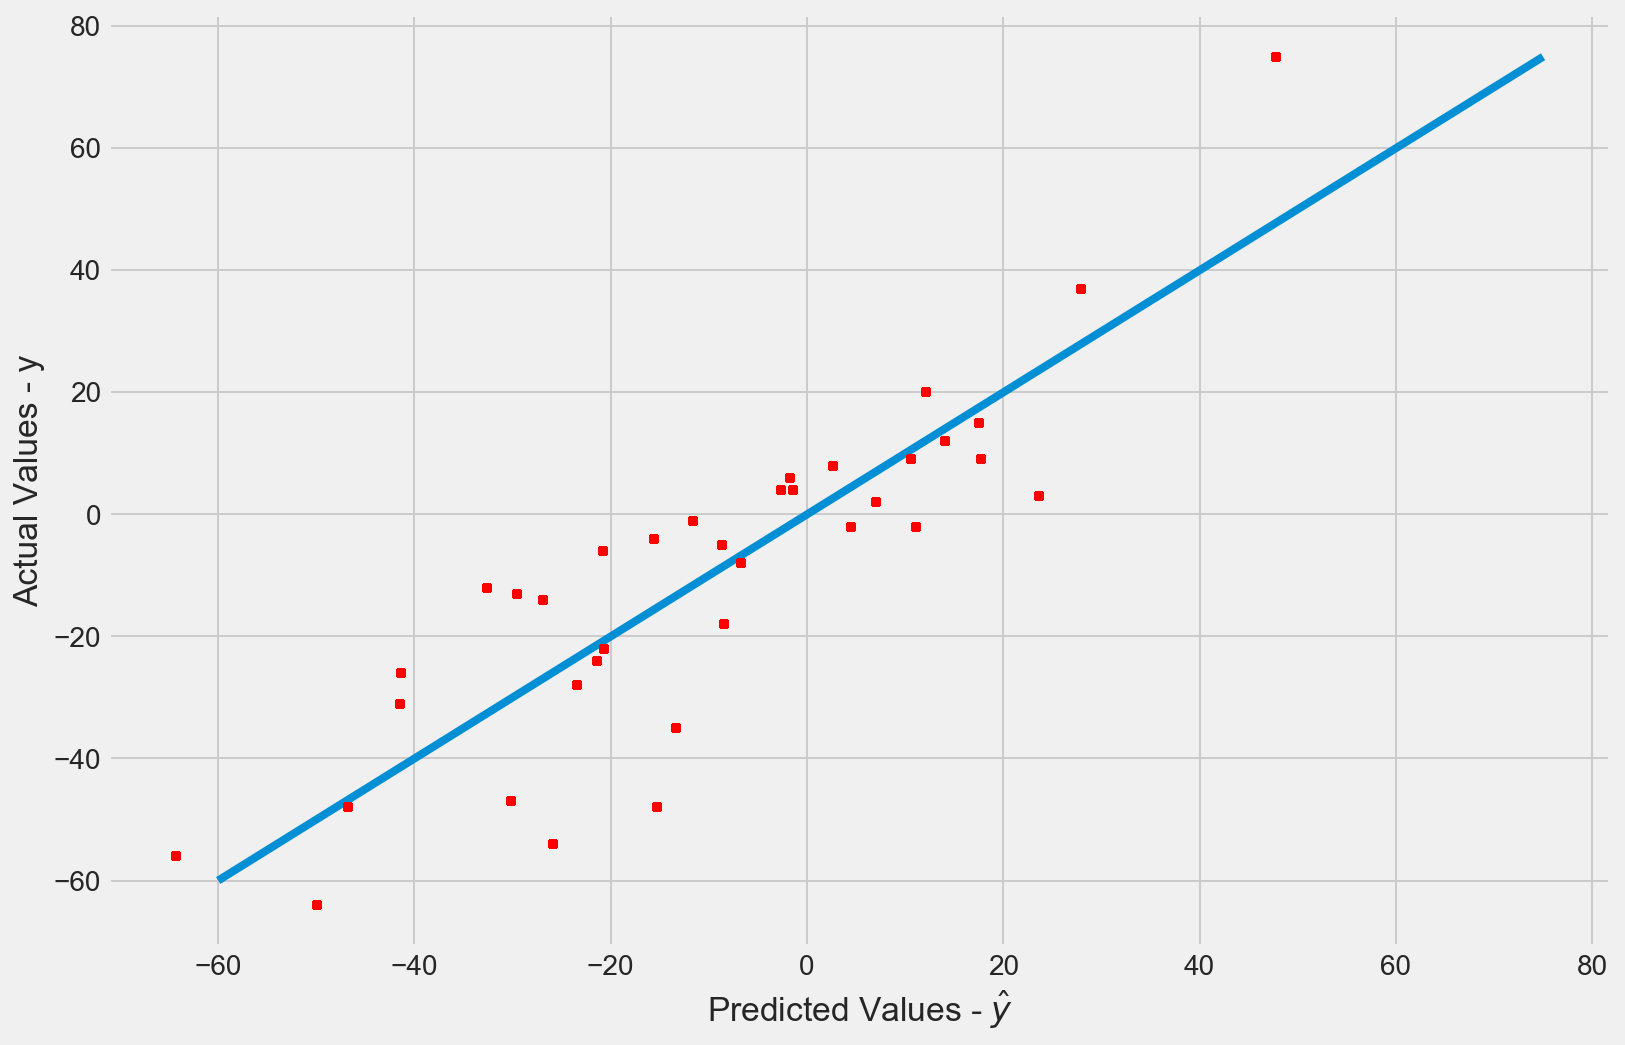

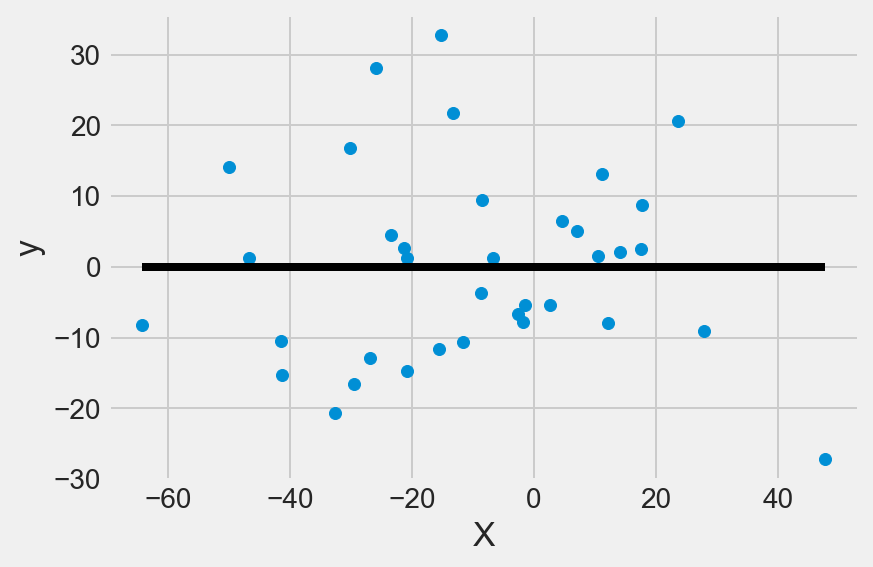

In [209]:
from sklearn.linear_model import LinearRegression
    
linreg = LinearRegression(fit_intercept=True,
                                   normalize=False,
                                   copy_X=True,
                                   n_jobs=1)  

model_SKlearn = linreg.fit(INDs, dep)
    
Coefficients = model_SKlearn.coef_ 
print(f"Coefficients(Beta Vectors):")
print(f"{Coefficients}")
print('---------------------------------------------------')
print('---------------------------------------------------')
    
Intercept = model_SKlearn.intercept_
print(f"Intercept:")
print(f"{Intercept}")
print('---------------------------------------------------')
print('---------------------------------------------------')
    
predictedS_SKlearn = model_SKlearn.predict(INDs)
print(f"Predicted values(y_hat)")
print(f"{predictedS_SKlearn}")
print('---------------------------------------------------')
print('---------------------------------------------------')
    
RSquared = model_SKlearn.score(INDs, dep)
print(f"R-Squared by SKlearn:")
print(f"{RSquared}")
print('---------------------------------------------------')
print('---------------------------------------------------')
    
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics

MSE = metrics.mean_squared_error(dep, predictedS_SKlearn)
RMSE = metrics.mean_squared_error(dep, predictedS_SKlearn) ** 0.5
MedAE = metrics.median_absolute_error(dep, predictedS_SKlearn)
MeanAE = metrics.mean_absolute_error(dep, predictedS_SKlearn)
RSquared = metrics.r2_score(dep, predictedS_SKlearn)
        
print(f"Mean Squared Error (MSE) by SKlearn:")
print(f"{MSE}")
print('---------------------------------------------------')
print('---------------------------------------------------')
print(f"ROOT Mean Squared Error (RMSE) by SKlearn:")
print(f"{RMSE}")
print('---------------------------------------------------')
print('---------------------------------------------------')
print(f"Median Absolute Error (MedAE) by SKlearn:")
print(f"{MedAE}")
print('---------------------------------------------------')
print('---------------------------------------------------')
print(f"Mean Absolute Error (MeanAE) by SKlearn:")
print(f"{MeanAE}")
print('---------------------------------------------------')
print('---------------------------------------------------')
print(f"R-Squared by SKlearn:")
print(f"{RSquared}")
print('---------------------------------------------------')
print('---------------------------------------------------')
        
plt.figure(figsize=(12,8))
plt.scatter(predictedS_SKlearn, dep, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - y")
plt.plot([-60, np.max(dep)], [-60, np.max(dep)])
plt.show()
    
# Plot Residuals
plt.scatter(predictedS_SKlearn, predictedS_SKlearn - dep)
plt.hlines(y=0, xmin=predictedS_SKlearn.min(), xmax=predictedS_SKlearn.max())
plt.xlabel('X')
plt.ylabel('y')
plt.show();

#### StatsModel Metrics & Table

In [210]:
# # statsmodel
# import statsmodels.api as sm
    
# INDs = np.concatenate([INDs, np.ones((INDs.shape[0], 1))], axis=1)
    
# model_SM = sm.OLS(dep, INDs)
# model_SM = model_SM.fit()
# predictedS_SM = model_SM.predict(INDs)
    
# MSE_SM = mean_squared_error(dep, predictedS_SM)
# print(f"Mean Squared Error (MSE) by Stats Model:")
# print(f"{MSE_SM}")
# print('---------------------------------------------------')
# print('---------------------------------------------------')
    
# plt.figure(figsize=(8,6))
# plt.scatter(predictedS_SM, dep, s=30, c='r', marker='+', zorder=10)
# plt.xlabel("Predicted Values - $\hat{y}$")
# plt.ylabel("Actual Values - $y$")
# plt.show();
    
# print(model_SM.summary())

#### Correlation HeatMap

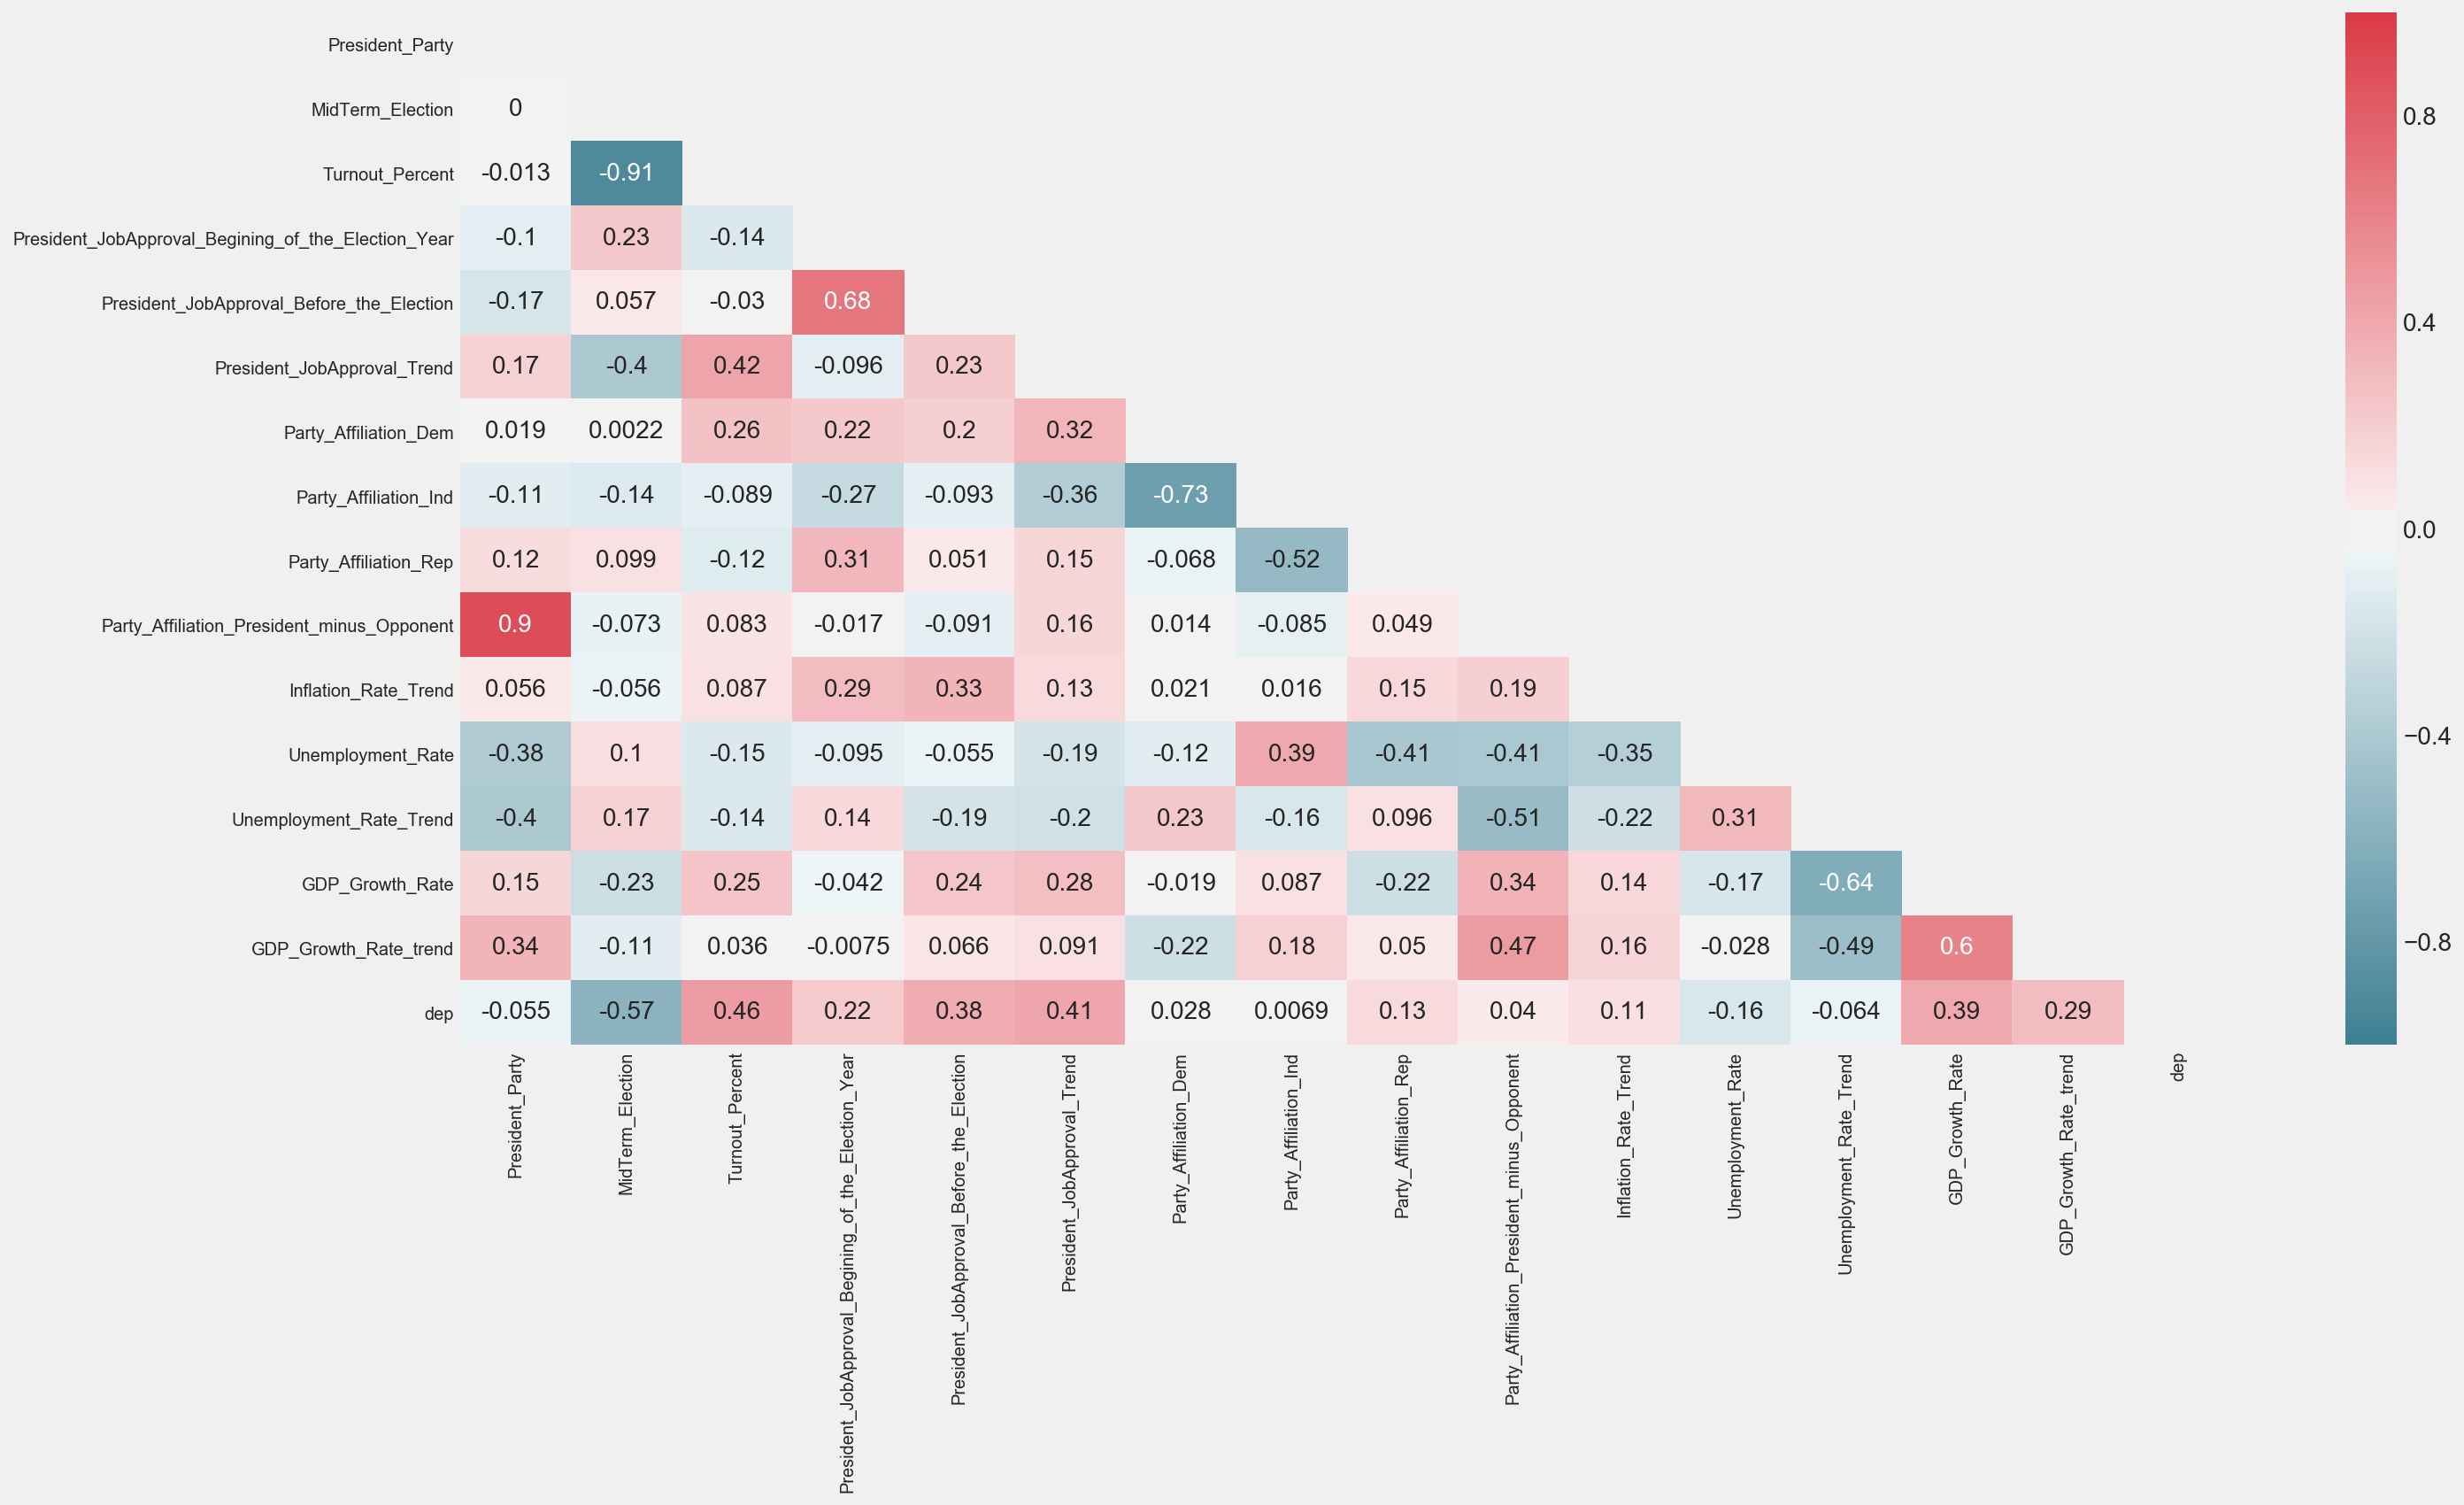

In [211]:
def correlation_heat_map(df):
    corrs = df.corr()
    
    fig, ax = plt.subplots(figsize=(20,10))
        
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
        
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)
        
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)
        
    plt.show()
        
df_with_target = df.copy()
df_with_target['dep'] = y
correlation_heat_map(df_with_target)

#### Train - Test Split

R-Squared for Training Data: 0.7648967911291883
---------------------------------------------------
---------------------------------------------------
MSE for Training Data: 188.29356304289183
---------------------------------------------------
---------------------------------------------------
Predicted Value of Trained Data: 
[-2.56428819e+01 -1.88252173e+01  1.11378902e+01 -3.28186442e+01
 -1.90768759e+01 -1.34583100e+01  3.09223813e+01 -3.10977474e+01
 -6.43040775e+01 -7.97411400e+00 -5.91507983e+00 -7.19910373e+00
  1.79524886e+01  3.95565000e+00 -6.94600738e+00  4.87882349e+01
 -3.17085151e+01 -2.38433724e+01  2.10158088e-02 -2.83851982e+01
 -4.98724677e+01  1.06819767e+01  2.88670223e+00 -3.15136977e+01
 -5.51265970e+00 -4.10654213e+01  2.42308168e+01 -1.61508948e+01
 -2.29059978e+01  1.21517599e+01 -4.85935773e+01  1.50809446e+01]
---------------------------------------------------
---------------------------------------------------
True Value of Trained Data: 
[-14.0, -24.0,

Text(0.5,1,'Residual Plot')

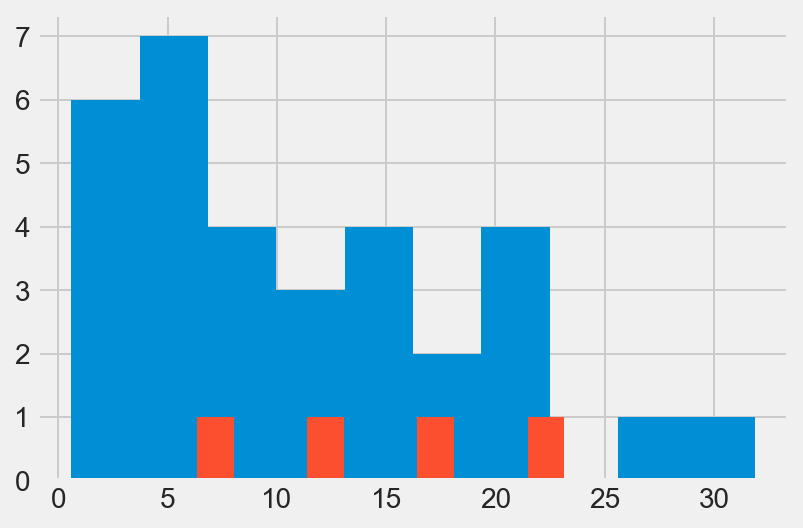

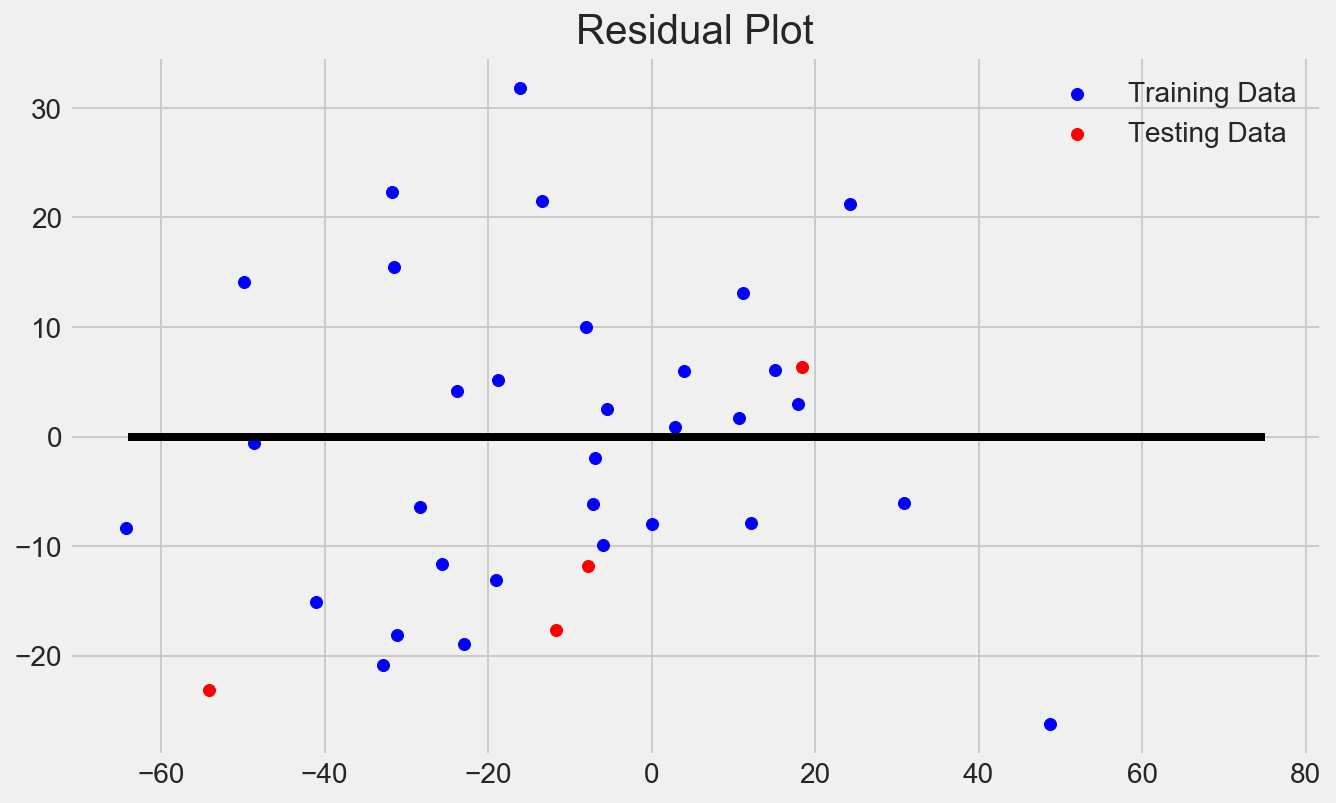

In [212]:
from sklearn.model_selection import train_test_split
    
size = 0.1
    
train_test_split(INDs, dep, test_size=size)

INDs_train, INDs_test, dep_train, dep_test = train_test_split(INDs, dep, test_size=size, random_state=42) 

lr = LinearRegression()
model_TT = lr.fit(INDs_train, dep_train)
    
RSquared_Trained = model_TT.score(INDs_train, dep_train)
print(f"R-Squared for Training Data: {RSquared_Trained}")
print('---------------------------------------------------')
print('---------------------------------------------------')
    
predictedS_Train = model_TT.predict(INDs_train)
MSE_Trained = mean_squared_error(dep_train, predictedS_Train)
print(f"MSE for Training Data: {MSE_Trained}")
print('---------------------------------------------------')
print('---------------------------------------------------')

print(f"Predicted Value of Trained Data: ")
print(f"{predictedS_Train}")
print('---------------------------------------------------')
print('---------------------------------------------------') 

print(f"True Value of Trained Data: ")
print(f"{dep_train}")
print('---------------------------------------------------')
print('---------------------------------------------------') 

pred = lr.predict(INDs_train)
res = np.abs(pred-dep_train)
pd.Series(res).hist()
    
RSquared_Test = model_TT.score(INDs_test, dep_test)
print(f"R-Squared for Testing Data: {RSquared_Test}")
print('---------------------------------------------------')
print('---------------------------------------------------')
    
predictedS_Test = model_TT.predict(INDs_test)
MSE_Test = mean_squared_error(dep_test, predictedS_Test)
print(f"MSE for Testing Data: {MSE_Test}")
print('---------------------------------------------------')
print('---------------------------------------------------')    

print(f"Predicted Value of Testing Data: ")
print(f"{predictedS_Test}")
print('---------------------------------------------------')
print('---------------------------------------------------') 

print(f"True Value of Testing Data: ")
print(f"{dep_test}")
print('---------------------------------------------------')
print('---------------------------------------------------') 
    
pred1 = lr.predict(INDs_test)
res1 = np.abs(pred1-dep_test)
pd.Series(res1).hist()

plt.figure(figsize=(10,6))
plt.scatter(model_TT.predict(INDs_train), model_TT.predict(INDs_train) - dep_train, c="blue", label="Training Data")
plt.scatter(model_TT.predict(INDs_test), model_TT.predict(INDs_test) - dep_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=min(dep), xmax=max(dep))
plt.title("Residual Plot")  

#### Cross-Validation

In [213]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
    
# iterating through folds 5-10
for folds in range(2,35):
    print ('------------------------------------\n')
    print(f"K: {folds}")
    model_KFold = LinearRegression()
    print('---------------------------------------------------')
    print('---------------------------------------------------')
        
    # Performing cross-validation
    scores_KFold = cross_val_score(model_KFold, INDs, dep, cv=folds)
    print(f"Cross-Validated Scores: {scores_KFold}")
    print('---------------------------------------------------')
    print('---------------------------------------------------')
    print(f"Mean CV R2: {np.mean(scores_KFold)}")
    print('---------------------------------------------------')
    print('---------------------------------------------------')
    print(f"Std CV R2: {np.std(scores_KFold)}")
    print('---------------------------------------------------')
    print('---------------------------------------------------')
                
    # Makeing cross-validated predictions
    predictionS_KFold = cross_val_predict(model_KFold, INDs, dep, cv=folds)
        
    RSquared_KFold = metrics.r2_score(dep, predictionS_KFold)
    print(f"Cross-Predicted R-Sqaured: {RSquared_KFold}")
    print('---------------------------------------------------')
    print('---------------------------------------------------')

------------------------------------

K: 2
---------------------------------------------------
---------------------------------------------------
Cross-Validated Scores: [-14.24393497 -14.89894204]
---------------------------------------------------
---------------------------------------------------
Mean CV R2: -14.57143850820497
---------------------------------------------------
---------------------------------------------------
Std CV R2: 0.32750353608619864
---------------------------------------------------
---------------------------------------------------
Cross-Predicted R-Sqaured: -14.4332692655169
---------------------------------------------------
---------------------------------------------------
------------------------------------

K: 3
---------------------------------------------------
---------------------------------------------------
Cross-Validated Scores: [-0.03665065 -1.9075066  -6.71007642]
---------------------------------------------------
-----------------

Cross-Predicted R-Sqaured: -0.7044680579294456
---------------------------------------------------
---------------------------------------------------
------------------------------------

K: 13
---------------------------------------------------
---------------------------------------------------
Cross-Validated Scores: [ -1.36535996  -1.20054488  -0.32761728   0.7587523   -1.39153781
  -4.32964758  -4.08021426  -1.60975315  -0.41642461 -15.28567551
 -24.39695112   0.47890493  -4.20162506]
---------------------------------------------------
---------------------------------------------------
Mean CV R2: -4.412899537637947
---------------------------------------------------
---------------------------------------------------
Std CV R2: 7.003690649575393
---------------------------------------------------
---------------------------------------------------
Cross-Predicted R-Sqaured: -0.6864158033979673
---------------------------------------------------
---------------------------------

Cross-Predicted R-Sqaured: -0.3333079858743855
---------------------------------------------------
---------------------------------------------------
------------------------------------

K: 24
---------------------------------------------------
---------------------------------------------------
Cross-Validated Scores: [-1.04640594e+00 -7.48663184e+00 -2.31553372e+00  1.40388646e-02
 -8.97361284e-01  5.55773932e-03 -2.30445602e+00  6.62305372e-01
 -1.41242575e+01 -1.57383006e-01 -3.41805263e+02  9.27432487e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
---------------------------------------------------
---------------------------------------------------
Mean CV R2: -15.355331563941379
---------------------------------------------------
---------------------------------------------------
Std CV R2: 68.14243940272512
-----------------

Cross-Validated Scores: [-1.04640594 -7.48663184 -2.31553372  0.01403886 -0.89736128  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
---------------------------------------------------
---------------------------------------------------
Mean CV R2: -0.37844819102035593
---------------------------------------------------
---------------------------------------------------
Std CV R2: 1.3780755458126837
---------------------------------------------------
---------------------------------------------------
Cross-Predicted R-Sqaured: -0.4213530586913792
---------------------------------------------------
---------------------------------------------------
------------------------------------

K: 32
---------------------------------------------------
---------------

In [214]:
# from itertools import combinations

# combs = []
# for i in range(1, len(df.columns)+1):
#     for c in combinations(df.columns.tolist(), i):
#         combs.append(c)

# R2_results = {}
# linreg = LinearRegression()
# for i,c in enumerate(combs):
#     if (i % 250) == 0:
#         print (i) 
#     subX = df[list(c)]
#     R2_results[c] = np.mean(cross_val_score(linreg, subX, dep))

In [215]:
# results = R2_results.items()
# results = sorted(results, key=lambda x: x[1], reverse=True)
# results

#### Standardization

In [216]:
INDs_to_be_scaled = X1
dep_should_not_be_scaled = House.President_Party_GainLoss_Number.values.reshape(-1, 1)

print(INDs_to_be_scaled.shape, dep_should_not_be_scaled.shape)

(36, 16) (36, 1)


R-Squared for Training Data_Scaled: 0.7648967911291883
---------------------------------------------------
---------------------------------------------------
MSE for Training Data_scaled: 188.29356304289183
---------------------------------------------------
---------------------------------------------------
Predicted values for Training Data_Scaled: 
[-2.56428819e+01 -1.88252173e+01  1.11378902e+01 -3.28186442e+01
 -1.90768759e+01 -1.34583100e+01  3.09223813e+01 -3.10977474e+01
 -6.43040775e+01 -7.97411400e+00 -5.91507983e+00 -7.19910373e+00
  1.79524886e+01  3.95565000e+00 -6.94600738e+00  4.87882349e+01
 -3.17085151e+01 -2.38433724e+01  2.10158088e-02 -2.83851982e+01
 -4.98724677e+01  1.06819767e+01  2.88670223e+00 -3.15136977e+01
 -5.51265970e+00 -4.10654213e+01  2.42308168e+01 -1.61508948e+01
 -2.29059978e+01  1.21517599e+01 -4.85935773e+01  1.50809446e+01]
---------------------------------------------------
---------------------------------------------------
True Value of Train

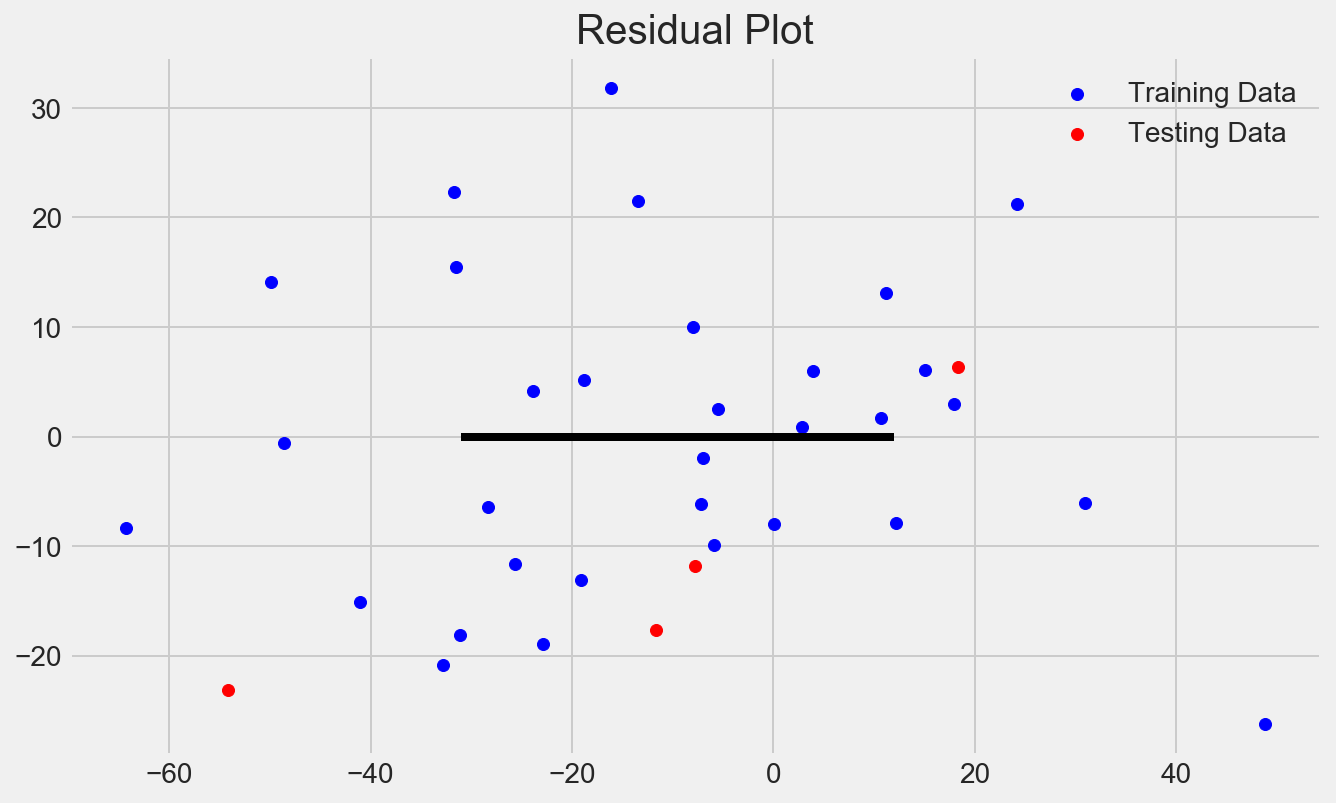

In [217]:
from sklearn.model_selection import train_test_split

size = 0.1

INDs_to_be_scaled_train, INDs_to_be_scaled_test, dep_should_not_be_scaled_train, dep_should_not_be_scaled_test = train_test_split(INDs_to_be_scaled, dep_should_not_be_scaled, test_size = size, random_state=42)

# Standardization
from sklearn.preprocessing import StandardScaler

INDs_scaler = StandardScaler().fit(INDs_to_be_scaled_train)

INDs_train_scaled = INDs_scaler.transform(INDs_to_be_scaled_train)
INDs_test_scaled = INDs_scaler.transform(INDs_to_be_scaled_test)

dep_train = dep_train
dep_test = dep_test

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

lr = LinearRegression()
model_TT_scaled = lr.fit(INDs_train_scaled, dep_train)

RSquared_Trained_scaled = model_TT_scaled.score(INDs_train_scaled, dep_train)
print(f"R-Squared for Training Data_Scaled: {RSquared_Trained_scaled}")
print('---------------------------------------------------')
print('---------------------------------------------------')
    
predictedS_Train_scaled = model_TT_scaled.predict(INDs_train_scaled)
MSE_Trained_scaled = mean_squared_error(dep_train, predictedS_Train_scaled)
print(f"MSE for Training Data_scaled: {MSE_Trained_scaled}")
print('---------------------------------------------------')
print('---------------------------------------------------')

print(f"Predicted values for Training Data_Scaled: ")
print(f"{predictedS_Train_scaled}")
print('---------------------------------------------------')
print('---------------------------------------------------')  

print(f"True Value of Trained Data_Scaled: ")
print(f"{dep_train}")
print('---------------------------------------------------')
print('---------------------------------------------------') 
        
RSquared_Test_scaled = model_TT_scaled.score(INDs_test_scaled, dep_test)
print(f"R-Squared for Testing Data_scaled: {RSquared_Test_scaled}")
print('---------------------------------------------------')
print('---------------------------------------------------')
    
predictedS_Test_scaled = model_TT_scaled.predict(INDs_test_scaled)
MSE_Test_scaled = mean_squared_error(dep_test, predictedS_Test_scaled)
print(f"MSE for Testing Data: {MSE_Test}")
print('---------------------------------------------------')
print('---------------------------------------------------')  

print(f"Predicted values for Testing Data_Scaled: ")
print(f"{predictedS_Test_scaled}")
print('---------------------------------------------------')
print('---------------------------------------------------')  

print(f"True Value of Testing Data_Scaled: ")
print(f"{dep_test}")
print('---------------------------------------------------')
print('---------------------------------------------------') 

plt.figure(figsize=(10,6))
plt.scatter(model_TT_scaled.predict(INDs_train_scaled), model_TT_scaled.predict(INDs_train_scaled) - dep_train, c="blue", label="Training Data")
plt.scatter(model_TT_scaled.predict(INDs_test_scaled), model_TT_scaled.predict(INDs_test_scaled) - dep_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=min(dep_test), xmax=max(dep_test))
plt.title("Residual Plot")
plt.show();

#### Regularization - Ridge

In [218]:
lambda_ridge_range = 10. ** np.arange(-2, 3)
lambda_ridge_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [219]:
# Creating an array of lambda values for Ridge Regression
lambda_ridge_range = 10. ** np.arange(-2, 3)
lambda_ridge_range
    
# Selecting the bset Lambda with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas = lambda_ridge_range, normalize=True, scoring='neg_mean_squared_error')
model_ridge_cv = ridgeregcv.fit(INDs_train_scaled, dep_train)
best_lam_ridge_cv = model_ridge_cv.alpha_
print(f"Best Lambda for Ridge Regression in {lambda_ridge_range}: {best_lam_ridge_cv}")
print('---------------------------------------------------')
print('---------------------------------------------------')
    
# Metrics Ridge Regression
predictS_ridge_cv_test = model_ridge_cv.predict(INDs_test_scaled)
    
MSE_ridge_cv_test = metrics.mean_squared_error(dep_test, predictS_ridge_cv_test)
print(f" MSE based on RidgeCV Model (using the best Lambda value= {best_lam_ridge_cv}) for testing data: {MSE_ridge_cv_test}")
print('---------------------------------------------------')
    
RMSE_ridge_cv_test = np.sqrt(metrics.mean_squared_error(dep_test, predictS_ridge_cv_test))
print(f" RMSE based on RidgeCV Model (using the best Lambda value= {best_lam_ridge_cv}) for testing data: {RMSE_ridge_cv_test}")
print('---------------------------------------------------')
    
RSquared_ridge_cv_test = metrics.r2_score(dep_test, predictS_ridge_cv_test)
print(f" R-Squared based on RidgeCV Model (using the best Lambda value= {best_lam_ridge_cv}) for testing data: {RSquared_ridge_cv_test}")
print('---------------------------------------------------')
print('\n')
    
# Coefficients
coef_ridge_cv = model_ridge_cv.coef_
print(f" Coefficients based on RidgeCV Model (using the best Lambda value= {best_lam_ridge_cv}): ")
print('\n')
print(f"{coef_ridge_cv}")
print('---------------------------------------------------')
print('\n')

# Intercept
intercept_ridge_cv = model_ridge_cv.intercept_
print(f" Intercept based on RidgeCV Model (using the best Lambda value= {best_lam_ridge_cv}): ")
print('\n')
print(f"{intercept_ridge_cv}")
print('---------------------------------------------------')
print('\n')

Best Lambda for Ridge Regression in [1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]: 1.0
---------------------------------------------------
---------------------------------------------------
 MSE based on RidgeCV Model (using the best Lambda value= 1.0) for testing data: 95.68112572749128
---------------------------------------------------
 RMSE based on RidgeCV Model (using the best Lambda value= 1.0) for testing data: 9.781672951366309
---------------------------------------------------
 R-Squared based on RidgeCV Model (using the best Lambda value= 1.0) for testing data: 0.6633169096899361
---------------------------------------------------


 Coefficients based on RidgeCV Model (using the best Lambda value= 1.0): 


[-1.21819255 -6.07099904  3.05548313  2.63053347  3.20843642  3.3334394
 -0.64542136  1.02652825  1.97885144 -0.18083489 -2.64207855  0.12502142
 -1.17858569  2.73534943  3.06154557  2.88941917]
---------------------------------------------------


 Intercept based on RidgeCV Mo

#### Regularization - Lasso

In [220]:
# Creating an array of lambda values for Lasso Regression
lambda_lasso_range = 10. ** np.arange(-2, 3)
lambda_lasso_range
    
# Selecting the bset alpha with LassoCV
from sklearn.linear_model import LassoCV
# n_lambdas = 10
# lassoregcv = LassoCV(n_alphas = n_lambdas, normalize=True, random_state=1)
n_lambdas = len(lambda_lasso_range)
lassoregcv = LassoCV(n_alphas = n_lambdas, alphas = lambda_lasso_range, normalize=True, random_state=1)
model_lasso_cv = lassoregcv.fit(INDs_train_scaled, dep_train)
best_lam_lasso_cv = model_lasso_cv.alpha_
print(f"Best Lambda for Lasso Regression with n_lambdas= {n_lambdas}: {best_lam_lasso_cv}")
    
# Metrics
predictS_lasso_cv_test = model_lasso_cv.predict(INDs_test_scaled)
    
MSE_lasso_cv_test = metrics.mean_squared_error(dep_test, predictS_lasso_cv_test)
print(f" MSE based on LassoCV Model (using the best Lambda value= {best_lam_lasso_cv}) for testing data: {MSE_lasso_cv_test}")
print('---------------------------------------------------')
    
RMSE_lasso_cv_test = np.sqrt(metrics.mean_squared_error(dep_test, predictS_lasso_cv_test))
print(f" RMSE based on LassoCV Model (using the best Lambda value= {best_lam_lasso_cv}) for testing data: {RMSE_lasso_cv_test}")
print('---------------------------------------------------')
    
RSquared_lasso_cv_test = metrics.r2_score(dep_test, predictS_lasso_cv_test)
print(f" R-Squared based on LassoCV Model (using the best Lambda value= {best_lam_lasso_cv}) for testing data: {RSquared_lasso_cv_test}")
print('---------------------------------------------------')
print('\n')
    
# Coefficients
coef_lasso_cv = model_lasso_cv.coef_
print(f" Coefficients based on lassoCV Model (using the best Lambda value= {best_lam_lasso_cv}): ")
print('\n')
print(f"{coef_lasso_cv}")
print('---------------------------------------------------')
print('\n')

# Intercept
intercept_lasso_cv = model_lasso_cv.intercept_
print(f" Intercept based on LassoCV Model (using the best Lambda value= {best_lam_lasso_cv}): ")
print('\n')
print(f"{intercept_lasso_cv}")
print('---------------------------------------------------')
print('\n')

Best Lambda for Lasso Regression with n_lambdas= 5: 1.0
 MSE based on LassoCV Model (using the best Lambda value= 1.0) for testing data: 108.79886420437767
---------------------------------------------------
 RMSE based on LassoCV Model (using the best Lambda value= 1.0) for testing data: 10.430669403464846
---------------------------------------------------
 R-Squared based on LassoCV Model (using the best Lambda value= 1.0) for testing data: 0.6171581642247542
---------------------------------------------------


 Coefficients based on lassoCV Model (using the best Lambda value= 1.0): 


[ -0.         -10.40623284   0.           0.15979901   4.21082861
   0.45785322   0.          -0.           0.          -0.
  -0.36452598   0.          -0.           0.           1.46915784
   0.03593554]
---------------------------------------------------


 Intercept based on LassoCV Model (using the best Lambda value= 1.0): 


-11.09375
---------------------------------------------------




#### Regularization - Elastic

In [221]:
from sklearn.linear_model import ElasticNet

lambda_value = 0.83
elastic = ElasticNet(alpha = lambda_value)
model_elastic = elastic.fit(INDs_train_scaled, dep_train)

predictS_Elastic = model_elastic.predict(INDs_test_scaled)

RSquared_elastic = metrics.r2_score(dep_test, predictS_Elastic)
print(f" R-Squared based on ElasticNet Model (using Lambda value= {lambda_value}) for testing data: {RSquared_elastic}")
print('---------------------------------------------------')
print('\n')
    
# Coefficients
coef_elastic = model_elastic.coef_
print(f" Coefficients based on Elastic Model (using the best Lambda value= {lambda_value}): ")
print('\n')
print(f"{coef_elastic}")
print('---------------------------------------------------')
print('\n')

# Intercept
intercept_elastic = model_elastic.intercept_
print(f" Intercept based on ElasticNet Model (using the best Lambda value= {lambda_value}): ")
print('\n')
print(f"{intercept_elastic}")
print('---------------------------------------------------')
print('\n')

 R-Squared based on ElasticNet Model (using Lambda value= 0.83) for testing data: 0.6708007008162634
---------------------------------------------------


 Coefficients based on Elastic Model (using the best Lambda value= 0.83): 


[-1.03642711 -8.77802457  2.26565326  3.23589797  4.16969497  3.92609828
 -0.58535759  1.61476133  2.41575497 -0.         -3.07572775  0.
 -1.35208377  4.96191475  3.87201482  3.83190461]
---------------------------------------------------


 Intercept based on ElasticNet Model (using the best Lambda value= 0.83): 


-11.093750000000002
---------------------------------------------------




## Prediction

#### Prediction Based on MLP

In [222]:
# https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html
Predictors_with_Target_df_Original = House_Original[Predictors_with_Target]
# Predictors_with_Target_df_Original = pd.get_dummies(Predictors_with_Target_df_Original)
Predictors_with_Target_df_Original = Predictors_with_Target_df_Original.fillna(0)
Predictors_with_Target_df_Original.columns

Index(['President_Party_GainLoss_Number', 'President_Party',
       'MidTerm_Election', 'Turnout_Percent',
       'President_JobApproval_Begining_of_the_Election_Year',
       'President_JobApproval_Before_the_Election',
       'President_JobApproval_Trend', 'Party_Affiliation_Dem',
       'Party_Affiliation_Ind', 'Party_Affiliation_Rep',
       'Party_Affiliation_President_minus_Opponent', 'Inflation_Rate',
       'Inflation_Rate_Trend', 'Unemployment_Rate', 'Unemployment_Rate_Trend',
       'GDP_Growth_Rate', 'GDP_Growth_Rate_trend'],
      dtype='object')

In [223]:
Features_to_be_Forcasted_36 = Predictors_with_Target_df_Original.iloc[36][1:]
Features_to_be_Forcasted_36

# Prediction_List = []

# for i in range(36, Predictors_with_Target_df_Original.shape[0]):
#     Result = np.dot(Predictors_with_Target_df_Original.iloc[i][1:].values, Coefficients)

# Result

President_Party                                          0
MidTerm_Election                                         1
Turnout_Percent                                         36
President_JobApproval_Begining_of_the_Election_Year     37
President_JobApproval_Before_the_Election               44
President_JobApproval_Trend                              1
Party_Affiliation_Dem                                   30
Party_Affiliation_Ind                                   39
Party_Affiliation_Rep                                   28
Party_Affiliation_President_minus_Opponent              -2
Inflation_Rate                                         1.9
Inflation_Rate_Trend                                     0
Unemployment_Rate                                      3.7
Unemployment_Rate_Trend                                  0
GDP_Growth_Rate                                        3.5
GDP_Growth_Rate_trend                                    1
Name: 36, dtype: object

In [224]:
Features_to_be_Forcasted_36.shape

(16,)

In [225]:
Y_Prediction_36_MLP = Intercept + np.dot(Features_to_be_Forcasted_36, Coefficients)
Y_Prediction_36_MLP

1.3793581587633241

#### Prediction Based on Regularization ----> Ridge, Lasso, & ElasticNet 

In [303]:
# List of Possible Features to be Predicted
list_turnout = [0, 1, 44, 37, 44, 1, 30, 39, 28, -2, 1.9, 0, 3.7, 0, 3.5, 1]

# # Political Features
# list_turnout = [0, 1, 36, 37, 44, 1 , 30, 39, 28, -2]

# #Economic Features
# list_turnout = [1.9, 0, 3.7, 0, 3.5, 1]

In [304]:
# Creating a Dataframe
X1_df_New = X1_df 
X1_df_New.loc[36] = list_turnout

In [305]:
X1_New = X1_df_New[X1_df_New.columns].values

In [306]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X1_New)
X1_New_scaled = scaler.transform(X1_New)

X1_New_scaled[36]

# from sklearn import preprocessing
# X1_New_turnout_scaled = preprocessing.scale(X1_New_turnout)
# X1_New_turnout_scaled

array([-0.97332853,  0.97332853, -0.61957127, -1.23081785, -0.52964722,
        1.28173989, -1.81388861,  1.05365486,  0.46359326, -0.10812681,
       -0.51631016, -1.02740233, -1.19470025, -0.73598007,  0.21004057,
        0.87287156])

In [307]:
Predicted_Value_scaled_Ridge = intercept_ridge_cv + np.dot(X1_New_scaled[36], coef_ridge_cv)
Predicted_Value_scaled_Ridge

-11.389675849000087

In [308]:
Predicted_Value_scaled_Lasso = intercept_lasso_cv + np.dot(X1_New_scaled[36], coef_lasso_cv)
Predicted_Value_scaled_Lasso

-22.534363364009096

In [309]:
Predicted_Value_scaled_Elastic = intercept_elastic + np.dot(X1_New_scaled[36], coef_elastic)
Predicted_Value_scaled_Elastic

-13.598995920160684